# Stage Boundary Visualization

In [10]:
import constants as c
import pandas as pd
import harry_plotter

from utils import ioutils

Retrieve labels

In [11]:
labels_path = ioutils.resolve_path(c.DATA_DIR) / c.LABEL_SUBDIR / c.LABEL_FILE
df_labels = pd.read_csv(labels_path,
                        index_col=c.ORBIT_COL,
                        parse_dates=c.EVENT_COLS)

Load an exemplary orbit

In [12]:
ORBIT_ID = 42

In [13]:
orbit_path = ioutils.resolve_path(c.DATA_DIR) / c.TRAIN_SUBDIR / c.ORBIT_FILE(ORBIT_ID)
df_orbit = pd.read_csv(orbit_path,
                       index_col=c.DATE_COL,
                       parse_dates=True)

Show stage boundary timestamps

In [14]:
df_labels.loc[ORBIT_ID]

SK outer in    2011-04-13 16:08:38.300
SK inner in    2011-04-13 16:09:40.700
MP outer in    2011-04-13 16:18:44.800
MP inner in    2011-04-13 16:20:16.200
MP inner out   2011-04-13 17:36:29.900
MP outer out   2011-04-13 17:39:35.400
SK inner out   2011-04-13 18:09:42.600
SK outer out   2011-04-13 18:12:18.900
Name: 42, dtype: datetime64[ns]

Plot magnetic flux density with stage boundaries

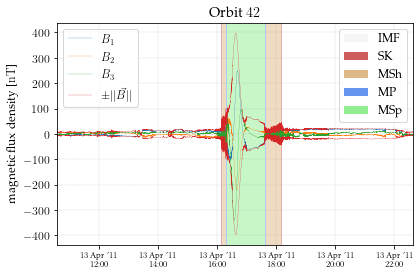

In [19]:
figpath = str(ioutils.resolve_path(c.TEMP_DIR) / c.MESSENGER(ORBIT_ID)) + "_events.pdf"
harry_plotter.plot_orbit(
    df_orbit.index,
    (df_orbit["BX_MSO"],
    df_orbit["BY_MSO"],
    df_orbit["BZ_MSO"]),
    symbol="B",
    labels=df_orbit[c.LABEL_COL],
    title=f"Orbit ${ORBIT_ID}$",
    ylabel="magnetic flux density [\si{nT}]",
    outfile=figpath
)